<a href="https://colab.research.google.com/github/Fabchirajoul/Boocamp_testing_with_alphineJs/blob/Main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PREPARING OUR ENVIRONMENT

This involves the installation of the different libraries which we will be using in the import the different modules from their respective libraries. The most common ones are:

1. Dataset: pip install datasets will install the dataset library which is a  convenient and efficient way to access and work with a wide variety of natural language processing (NLP) datasets

2. Transformers: pip install transformer: It provides a collection of pre-trained models, tokenizers, and utilities that make it easy for researchers and developers to work with state-of-the-art models in NLP

3. pip install accelerate -U: The -U stands for upgrade which will upgrade the accelerate python package if exist if not it installs the latest version.It provides a set of optimized libraries and tools to enhance the performance of various Python packages, such as NumPy, PyTorch, and TensorFlow, when running on NVIDIA GPUs

NB: Once these packages have been installed, please make sure to restart your kernel session by clicking on the Runtime  tab and then select "Restart session and run all"

In [ ]:
# pip install accelerate -U

In [ ]:
# pip install transformers

In [ ]:
# pip install datasets

In [ ]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast


# This is where point 3 above comes in handy. At times, our CPU becomes limited to process and train our model when the data involved is very huge.
# In such a case, it is adviceable to use GPU (Graphics Processing Unit) which is why we ran the command pip install accelerate -U
# In the case of the line code below, we are saying that if GPU is installed on the device, then it should be the preferred graphics otherwise, let the
# let the CPU be the graphic of choice to use in training the model.

# specify GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### LOADING OUR DATASET

In [ ]:
df = pd.read_csv('/content/Fine tuning ClimateBert Environmental Claims CSV UTF (3).csv')

# df.head() will print the first 10 entries of our dataset. By default, it will print the first 5 unless otherwise the number of
# records we want is specified which which in our case is 10. df.tail(10) will print the last 10 rows of our dataset
print("This is the first 10 entries of our dataset\n\n\n", df.head(10))
# print("This is the last 10 entries of our dataset", df.head(10))

This is the first 10 entries of our dataset


                                                 text  label
0  So it's going to be gradual but to get to a 55...      0
1  Even so, we plan to meet our sales and profit ...      0
2  In Europe, all of our pulp and paper mills fal...      0
3  The integration of fuel (upstream and procurem...      0
4  During Capital Markets Day 2020, Hydro announc...      0
5  John, I know you want to add anything at a hig...      0
6  I think all businesses have made their commitm...      0
7  Like as an example, for 2 decades, we have had...      0
8  To this end, Eiffage Route introduced a roadma...      0
9  And as you saw, we -- in the 2.7 agreement -- ...      0


In [ ]:
print("This is the last 10 entries of our dataset\n\n\n", df.tail(10))

This is the last 10 entries of our dataset


                                                   text  label
387  American Water has committed to reducing our G...      1
388  In 2018, we set a goal to have 2-3% of our US ...      1
389  In the beginning of 2021, we announced the int...      1
390  In 2020 we initiated our third multi-year envi...      1
391  We track a variety of climate-related metrics ...      1
392  AMP recognises that it has a corporate respons...      1
393  This target is a combined  target for all 5 fo...      1
394  This target reflects the ambition of the forme...      1
395  This Abs3 target is a year-by-year target in c...      1
396  In FY20, we reduced GHG emissions by 14% (131,...      1


In [ ]:
# It is common practice in machine learning to know the shape of our dataset which will come in handy when we do the
# train, test split when building our model.



print("The shape of our dataset is:", df.shape)
print("The columns in our dataset are:", df.columns)

The shape of our dataset is: (397, 2)
The columns in our dataset are: Index(['text', 'label'], dtype='object')


In [ ]:
# Always make it a practice to know the basic information about your data before you encode. Computer understands just integers not
# characters. Having the information about your dataset will enable you to know which column to encode into what the computer will understand.

# with df.info(), we will see that the text column comprises of objects and as such needs to be encoded into integers.
# The column label comprises of integers and as such we don't need to encode since its already in a format that can be understood by the computer.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    397 non-null    object
 1   label   397 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
# Not neccessary but then also important to have a description of your dataset to know how they are skewed.

df.describe()

,label
count,397.000000
mean,0.501259
std,0.500629
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# check class distribution
print(df['label'].value_counts(normalize = True))
# print(df['text'].value_counts(normalize = True))

1    0.501259
0    0.498741
Name: label, dtype: float64


In [ ]:
# Checking if there are repetition of entries in our text column to aid us during encoding so that we don't give different encoding to the same data
# Based on our dataset, there are no repitition.

df.select_dtypes(include="object").nunique()

text    389
dtype: int64

### Split train dataset into train, validation and test sets

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'],
                                                                    random_state=42,
                                                                    test_size=0.2,
                                                                    stratify=df['label'])


In [ ]:
print("The shape of of training text (train_text) is:", train_text.shape)
print("The shape of of training text (temp_text) is:", temp_text.shape)
print("The shape of of testing label size (train_label) is:", train_labels.shape)
print("The shape of of training label (temp_labels)  is:", temp_labels.shape)
print("The total should give us the total number of rows in our dataset")


The shape of of training text (train_text) is: (317,)
The shape of of training text (temp_text) is: (80,)
The shape of of testing label size (train_label) is: (317,)
The shape of of training label (temp_labels)  is: (80,)
The total should give us the total number of rows in our dataset


In [ ]:
# We have divided the available data into training and testing with 80% being our training data and 20% being our testing data

# It is further expected of us to divide the training amount into testing and  validation so that we know exactly how much data has been allocated for
# training and validation



# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2024,
                                                                test_size=0.8,
                                                                stratify=temp_labels)

In [ ]:
print("The shape of of test text of our testing data which 80% of training data (79) is:", val_text.shape)
print("The shape of of test text of our testing data which 80% of of training data (318) is:", test_text.shape)

The shape of of test text of our testing data which 80% of training data (79) is: (16,)
The shape of of test text of our testing data which 80% of of training data (318) is: (64,)


 We are done with splitting and data analysis of our dataset, It suffices that we call tokenizer to encode our split data set. We could have tokenize first before splitting which ever way we decide to go about it would still end  in the same  result.

### Import BERT Model and BERT Tokenizer

In [ ]:
# import BERT-base pretrained model

# There are different tokenizers which can be used from the transformer library such as AutoTokenizer, BertTokenizerFast etc
# Which ever one we use would still encode the text rows into machine understandable  data for fine tuning our pretained model from our checkpoint of choice.

# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Alternatively, using the automodel tokenizer would still work i.e.

# from transformers import AutoTokenizer
# bert = AutoModel.from_pretrained('bert-base-uncased', return_dict=False)

# # Load the BERT tokenizer
# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# sample data
text = ["So it's going to be gradual but to get to a 55% by the end of the year or for the year, we're starting at a place that is 56.7%."]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [ ]:
# output
print(sent_id)


{'input_ids': [[101, 2061, 2009, 1005, 1055, 2183, 2000, 2022, 16612, 2021, 2000, 2131, 2000, 1037, 4583, 1003, 2011, 1996, 2203, 1997, 1996, 2095, 2030, 2005, 1996, 2095, 1010, 2057, 1005, 2128, 3225, 2012, 1037, 2173, 2008, 2003, 5179, 1012, 1021, 1003, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


## Tokenization

<Axes: >

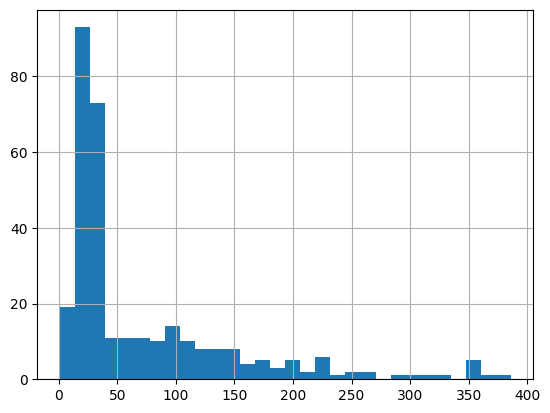

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 50

From our bert base pretained model, let us now tokenize all our split data which we have carefully allocated a dataframe shape i.e. train_text, val_text, and test_text

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print("This is the tokenizd data for our training dataframe \n")
tokens_train

# We could equally check the tokenized data for the different split dataframe if we want.

## Convert Integer Sequences to Tensors

#### Advantages of converting tokens into tensors:
##### 1. GPU Acceleration
##### 2. Seamless Integration with Deep Learning Libraries
##### 3. Batch Processing
##### 4. Compatibility with Pre-trained Models
##### 5. Automatic Differentiation



In [ ]:
# for train set converting the train tokenzers into tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set converting the validation tokenzers into tensors
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set converting the test tokenzers into tensors
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

#### Create DataLoaders

### wrap tensors
## train_seq:PyTorch tensors representing sequences, , and
## train_mask:PyTorch tensors representing attention masks
## train_y:PyTorch tensors representing labels
## train_data: is now an instance of the TensorDataset class, containing tuples of (train_seq[i], train_mask[i], train_y[i]) for each index i.



In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

### Freeze BERT Parameters

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

### Define Model Architecture

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):

      super(BERT_Arch, self).__init__()

      self.bert = bert

      # dropout layer
      self.dropout = nn.Dropout(0.1)

      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)

      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)

      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU but in this case CPU since my device does not have the GPU(NDIVIA installed)
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Find Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights

class_wts = compute_class_weight(class_weight = "balanced",classes = np.unique(train_labels),y = train_labels)
# class_wts = dict(zip(np.unique(train_labels), class_wts))
print(class_wts)

[1.00316456 0.99685535]


In [ ]:
# We are trying to solve for class imbalance in our dataset with this section of the code.


# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10

## Fine Tuning

In [ ]:
# function to train the model
def train(
    model=model,
    train_dataloader=train_dataloader,
    optimizer=optimizer,
    cross_entropy=cross_entropy,
    device=device,
    eval_dataset=val_dataloader
):

  model.train()

  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients
    model.zero_grad()

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():

  print("\nEvaluating...")

  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0

  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)

      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

## Start Model Training

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...

Training Loss: 0.661
Validation Loss: 0.644

 Epoch 2 / 10

Evaluating...

Training Loss: 0.529
Validation Loss: 0.604

 Epoch 3 / 10

Evaluating...

Training Loss: 0.507
Validation Loss: 0.640

 Epoch 4 / 10

Evaluating...

Training Loss: 0.505
Validation Loss: 0.710

 Epoch 5 / 10

Evaluating...

Training Loss: 0.542
Validation Loss: 0.528

 Epoch 6 / 10

Evaluating...

Training Loss: 0.465
Validation Loss: 0.486

 Epoch 7 / 10

Evaluating...

Training Loss: 0.413
Validation Loss: 0.478

 Epoch 8 / 10

Evaluating...

Training Loss: 0.331
Validation Loss: 0.481

 Epoch 9 / 10

Evaluating...

Training Loss: 0.358
Validation Loss: 0.408

 Epoch 10 / 10

Evaluating...

Training Loss: 0.362
Validation Loss: 0.414


In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...

Training Loss: 0.318
Validation Loss: 0.600

 Epoch 2 / 10

Evaluating...

Training Loss: 0.330
Validation Loss: 0.377

 Epoch 3 / 10

Evaluating...

Training Loss: 0.409
Validation Loss: 0.380

 Epoch 4 / 10

Evaluating...

Training Loss: 0.337
Validation Loss: 0.357

 Epoch 5 / 10

Evaluating...

Training Loss: 0.375
Validation Loss: 0.447

 Epoch 6 / 10

Evaluating...

Training Loss: 0.412
Validation Loss: 0.894

 Epoch 7 / 10

Evaluating...

Training Loss: 0.465
Validation Loss: 0.341

 Epoch 8 / 10

Evaluating...

Training Loss: 0.320
Validation Loss: 0.391

 Epoch 9 / 10

Evaluating...

Training Loss: 0.282
Validation Loss: 0.406

 Epoch 10 / 10

Evaluating...

Training Loss: 0.290
Validation Loss: 0.404


In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

### Get Predictions for Test Data

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.91      0.91      0.91        32

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



In [ ]:
# confusion matrix
pd.crosstab(test_y, preds)
# visualize_confusion_matrix(test_y, preds)

col_0,0,1
row_0,,
0,29,3
1,3,29


# MASK MODELLING

In [ ]:

import torch
import pandas as pd
from tqdm.auto import tqdm
from transformers import AdamW
from transformers import BertTokenizer, BertForMaskedLM

In [ ]:
tokenizer_Mask = BertTokenizer.from_pretrained('bert-base-uncased')




In [ ]:
df_Mask = pd.read_csv('/content/Pre-training CDPtrainfileutfcopy.csv')
df_Mask.head()

,text
0,Combined with the reality of corporate carbon ...
1,"As a science-based company, 3M uses the World ..."
2,Progress against target has been achieved thro...
3,The target covers our whole operated container...
4,"In 2015, we set ourselves the target of saving..."


In [ ]:
len(df_Mask)

3780

##### PREPROCESSING OF  THE DATA

## Data Cleaning

In [ ]:
# for sentence in df_Mask:
#     if len(sentence) < 50:
#         df_Mask.drop(sentence)

## Tokenizing the text data

In [ ]:
inputs = tokenizer_Mask(
    df_Mask.to_csv(),
    max_length=512,
    truncation=True,
    padding='max_length',
    return_tensors='pt'
)

In [ ]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
inputs['labels'] = inputs['input_ids'].detach().clone()
inputs

{'input_ids': tensor([[  101,  1010,  3793,  1014,  1010,  1000,  4117,  2007,  1996,  4507,
          1997,  5971,  6351, 11768,  1998,  4785, 10831,  1998,  6695,  1010,
          1996,  2194,  7883,  2041,  6851,  2968,  1997,  2943,  2224,  1010,
          7711,  1996,  2373,  8381,  1997,  2152,  1011,  2943, 15077,  3941,
          2107,  2004,  2250, 14372,  1010,  3084,  3679, 29589,  2000,  2735,
          2125, 14203,  2373,  6067,  1010,  1998, 15697,  2015,  2062,  4219,
          2000,  2490,  1996,  2224,  1997, 13918,  2943,  1012,  1999, 12609,
          1010,  1996,  2194,  4156,  1996,  2665,  2373,  2550,  2011,  1996,
          2951,  2078,  3612,  3888,  1006,  4466,  2213,  2860,  1007,  2622,
          1999, 19781, 14691,  3070,  2850,  2080,  2103,  1998, 19739,  2319,
          6979,  3612,  3888,  1006,  4749,  1012,  1022, 12464,  1007,  4403,
          2462,  2622,  1999, 22455,  6979,  2103,  2000, 16396,  6351, 11768,
          2096,  4637,  4968, 13918,  

### Masking the input_ids

In [ ]:
random_tensor = torch.rand(inputs['input_ids'].shape)


In [ ]:
random_tensor.shape

torch.Size([1, 512])

In [ ]:
# creating a random tensor of float values.
random_tensor

tensor([[6.8007e-01, 2.9526e-02, 7.1301e-01, 2.9950e-01, 3.1698e-02, 9.1627e-01,
         5.5208e-01, 5.8033e-02, 6.5962e-01, 1.4581e-01, 2.1655e-01, 3.4455e-02,
         6.0180e-01, 4.4106e-01, 9.6756e-01, 5.5546e-01, 3.0965e-01, 2.6306e-01,
         4.8776e-01, 9.8683e-01, 4.8247e-01, 1.6594e-01, 7.5967e-01, 1.0089e-01,
         7.8124e-01, 6.7216e-01, 9.2820e-01, 6.0957e-01, 8.3558e-01, 7.2606e-01,
         4.3962e-01, 7.7929e-01, 4.9729e-01, 3.4866e-01, 4.1676e-01, 2.8329e-01,
         1.3423e-01, 2.6659e-01, 4.7036e-01, 3.6063e-01, 5.9495e-01, 9.6829e-01,
         1.7466e-01, 5.9643e-01, 6.3762e-02, 6.5236e-02, 4.3054e-02, 4.1632e-01,
         1.9473e-01, 6.0556e-01, 3.9121e-02, 8.5205e-01, 7.7815e-01, 2.2039e-01,
         9.4445e-01, 6.1825e-01, 2.3980e-01, 2.1990e-01, 8.4198e-01, 9.9151e-01,
         8.6634e-01, 1.7206e-01, 1.8864e-03, 8.6265e-01, 8.9080e-01, 1.9049e-01,
         9.1233e-01, 3.3650e-01, 4.2247e-01, 8.2410e-01, 1.5590e-01, 4.6224e-01,
         7.2568e-01, 2.1293e

In [ ]:
# creating a mask tensor of float values ranging from 0 to 1 and avoiding special tokens
masked_tensor = (random_tensor < 0.15)*(inputs['input_ids'] != 101)*(inputs['input_ids'] != 102)*(inputs['input_ids'] != 0)

# where 101 = classification tokens which is a special token
# 101 is the padding tokens
# 0.15 implies we are masking 15% of the other tokens though we can change to 1 for full masking of the other tokens.

In [ ]:
masked_tensor

tensor([[False,  True, False, False,  True, False, False,  True, False,  True,
         False,  True, False, False, False, False, False, False, False, False,
         False, False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False, False,  True, False, False, False,
         False, False, False, False,  True,  True,  True, False, False, False,
          True, False, False, False, False, False, False, False, False, False,
         False, False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False,
          True, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False,
         False, False, False,  True, False,  True,  True, False, False, False,
          True, False,  True, False,  True,  True, False, False, False, False,
         False, False, False, False,  True, False, F

In [ ]:
# let us retrieve all the indices within our tokens that are true.

nonzeros_indices = []
for i in range(len(inputs['input_ids'])):
  masked_tensor[i].nonzero()

In [ ]:
masked_tensor[i].nonzero()

tensor([[  1],
        [  4],
        [  7],
        [  9],
        [ 11],
        [ 23],
        [ 36],
        [ 44],
        [ 45],
        [ 46],
        [ 50],
        [ 62],
        [ 75],
        [ 80],
        [ 95],
        [103],
        [105],
        [106],
        [110],
        [112],
        [114],
        [115],
        [124],
        [134],
        [140],
        [141],
        [154],
        [161],
        [168],
        [170],
        [180],
        [182],
        [185],
        [199],
        [201],
        [204],
        [208],
        [213],
        [217],
        [238],
        [244],
        [250],
        [254],
        [261],
        [264],
        [266],
        [272],
        [285],
        [292],
        [295],
        [296],
        [297],
        [301],
        [304],
        [307],
        [318],
        [319],
        [321],
        [323],
        [325],
        [326],
        [329],
        [336],
        [339],
        [340],
        [344],
        [3

In [ ]:
# the tokens that are true needs to be flattended and for that we invoke out torch library

torch.flatten(masked_tensor[i].nonzero())

tensor([  1,   4,   7,   9,  11,  23,  36,  44,  45,  46,  50,  62,  75,  80,
         95, 103, 105, 106, 110, 112, 114, 115, 124, 134, 140, 141, 154, 161,
        168, 170, 180, 182, 185, 199, 201, 204, 208, 213, 217, 238, 244, 250,
        254, 261, 264, 266, 272, 285, 292, 295, 296, 297, 301, 304, 307, 318,
        319, 321, 323, 325, 326, 329, 336, 339, 340, 344, 363, 381, 383, 384,
        400, 408, 413, 417, 434, 441, 445, 454, 455, 459, 476, 485, 490, 493,
        497, 501])

In [ ]:
# the flattended tokens needs to be converted to a list and for that we invoke the .to_list attribute so that it allows us to store values
# of mask indices.
nonzeros_indices.append(torch.flatten(masked_tensor[i].nonzero()).tolist())


In [ ]:
# lets now have a look at what we have appended
nonzeros_indices

[[1,
  4,
  7,
  9,
  11,
  23,
  36,
  44,
  45,
  46,
  50,
  62,
  75,
  80,
  95,
  103,
  105,
  106,
  110,
  112,
  114,
  115,
  124,
  134,
  140,
  141,
  154,
  161,
  168,
  170,
  180,
  182,
  185,
  199,
  201,
  204,
  208,
  213,
  217,
  238,
  244,
  250,
  254,
  261,
  264,
  266,
  272,
  285,
  292,
  295,
  296,
  297,
  301,
  304,
  307,
  318,
  319,
  321,
  323,
  325,
  326,
  329,
  336,
  339,
  340,
  344,
  363,
  381,
  383,
  384,
  400,
  408,
  413,
  417,
  434,
  441,
  445,
  454,
  455,
  459,
  476,
  485,
  490,
  493,
  497,
  501]]

In [ ]:
# let us now replace the true indiced values with the 103 ids i.e. the masked token ids

for i in range(len(inputs['input_ids'])):
  inputs['input_ids'][i, nonzeros_indices[i]] = 103

In [ ]:
# best practice is always to have a look at our dictionary how it looks
# we will see that wherever there was true, we now have 103 (masked token) instead of the actual indices

inputs['input_ids']

tensor([[  101,   103,  3793,  1014,   103,  1000,  4117,   103,  1996,   103,
          1997,   103,  6351, 11768,  1998,  4785, 10831,  1998,  6695,  1010,
          1996,  2194,  7883,   103,  6851,  2968,  1997,  2943,  2224,  1010,
          7711,  1996,  2373,  8381,  1997,  2152,   103,  2943, 15077,  3941,
          2107,  2004,  2250, 14372,   103,   103,   103, 29589,  2000,  2735,
           103, 14203,  2373,  6067,  1010,  1998, 15697,  2015,  2062,  4219,
          2000,  2490,   103,  2224,  1997, 13918,  2943,  1012,  1999, 12609,
          1010,  1996,  2194,  4156,  1996,   103,  2373,  2550,  2011,  1996,
           103,  2078,  3612,  3888,  1006,  4466,  2213,  2860,  1007,  2622,
          1999, 19781, 14691,  3070,  2850,   103,  2103,  1998, 19739,  2319,
          6979,  3612,  3888,   103,  4749,   103,   103, 12464,  1007,  4403,
           103,  2622,   103, 22455,   103,   103,  2000, 16396,  6351, 11768,
          2096,  4637,  4968, 13918,   103,  2537,  

In [ ]:
# we need to convert the tensors now to a pytorch data object so that we can be able to process the tensors into a pytoch data loader



## Pytorch Dataset

In [ ]:
# we need to convert the tensors now to a pytorch data object so that we can be able to process the tensors into a pytoch data loader

class MaskDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, index):
        input_ids = self.encodings
        ['input_ids'][index]
        labels = self.encodings['labels'][index]
        attention_mask = self.encodings['attention_mask'][index]
        token_type_ids = self.encodings['token_type_ids'][index]
        return {
            'input_ids': input_ids,
            'labels': labels,
            'attention_mask': attention_mask,
            'token_type_ids': token_type_ids
        }

In [ ]:
# Defining an instance of the data class passing the input of the encodings

dataset = MaskDataset(inputs)

In [ ]:
dataset

## DATA LOADER

In [ ]:
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=16, # depends on how much cpu/gpu your computer has
    shuffle=True
)

In [ ]:
# let us define the device we will be training on and assign it to gpu unless in the case there is no gpu then it switches to cpu
device_Mask = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device_Mask


device(type='cpu')

In [ ]:
# let us us now call our model from the huggingface and push it to our graphics device
from transformers import pipeline


model_Mask = pipeline('fill-mask', model='distilroberta-base')



Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# model_Mask.to(device_Mask)